pratical exercise inspired by [Sudipto Ghosh's work](https://www.kaggle.com/sudiptog81/kpmg-virtual-internship-module-2) and [Arthur Kiselnikov's youtube videos](https://www.youtube.com/watch?v=AL8aTyDASV4)

# Module 2

In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import sys

pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

%matplotlib inline
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8

import palettable
import squarify
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
file_path = sys.path[0] + '/KPMG_VI_New_raw_data_update_final.xlsx'
sheet_names = pd.ExcelFile(file_path).sheet_names
print(file_path)
print(sheet_names)

/Users/jarrywang/Documents/Job/KPMG/KPMG-Data-Analytic/KPMG_VI_New_raw_data_update_final.xlsx
['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


# Data Cleaning Old Customer

In [3]:
demo_df = pd.read_excel(file_path, header=1, sheet_name='CustomerDemographic', index_col=0)
demo_df.head()

first_name  last_name  gender  \
customer_id                                      
1                   Laraine  Medendorp       F   
2                       Eli    Bockman    Male   
3                     Arlin     Dearle    Male   
4                    Talbot        NaN    Male   
5            Sheila-kathryn     Calton  Female   

             past_3_years_bike_related_purchases        DOB  \
customer_id                                                   
1                                             93 1953-10-12   
2                                             81 1980-12-16   
3                                             61 1954-01-20   
4                                             33 1961-10-03   
5                                             56 1977-05-13   

                          job_title job_industry_category     wealth_segment  \
customer_id                                                                    
1               Executive Secretary                Health      Mass Customer   
2            Administrative Officer    Financial Services      Mass Customer   
3                Recruiting Manager              Property      Mass Customer   
4                               NaN                    IT      Mass Customer   
5                     Senior Editor                   NaN  Affluent Customer   

            deceased_indicator  \
customer_id                      
1                            N   
2                            N   
3                            N   
4                            N   
5                            N   

                                                       default owns_car  \
customer_id                                                               
1                                                           "'      Yes   
2                                 <script>alert('hi')</script>      Yes   
3                                          2018-02-01 00:00:00      Yes   
4            () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No   
5                                                          NIL      Yes   

             tenure  
customer_id          
1              11.0  
2              16.0  
3              15.0  
4               7.0  
5               8.0

In [4]:
# select feature
demo_df = demo_df.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)

# data cleaning
demo_df['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demo_df['gender'].replace('M', 'Male', inplace=True)
demo_df['gender'].replace('U', 'Unknown', inplace=True)
demo_df['deceased_indicator'].replace('N', 0, inplace=True)
demo_df['deceased_indicator'].replace('Y', 1, inplace=True)
demo_df['owns_car'].replace('Yes', 1, inplace=True)
demo_df['owns_car'].replace('No', 0, inplace=True)

# select valid data
demo_df = demo_df[demo_df['DOB'] > '1900']
demo_df[demo_df['deceased_indicator'] == 0]
demo_df = demo_df.drop(['deceased_indicator'], axis=1)
demo_df_clean = demo_df.dropna()

In [5]:
print(demo_df_clean.shape)
demo_df_clean.head()

(3256, 7)


gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   

            job_industry_category  wealth_segment  owns_car  tenure  
customer_id                                                          
1                          Health   Mass Customer         1    11.0  
2              Financial Services   Mass Customer         1    16.0  
3                        Property   Mass Customer         1    15.0  
4                              IT   Mass Customer         0     7.0  
6                          Retail  High Net Worth         1    13.0

In [6]:
# age class
demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)
demo_df_clean.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   

            job_industry_category  wealth_segment  owns_car  tenure  \
customer_id                                                           
1                          Health   Mass Customer         1    11.0   
2              Financial Services   Mass Customer         1    16.0   
3                        Property   Mass Customer         1    15.0   
4                              IT   Mass Customer         0     7.0   
6                          Retail  High Net Worth         1    13.0   

                   age  age_class  
customer_id                        
1            67.200503         70  
2            40.021300         40  
3            66.926712         70  
4            59.224980         60  
6            54.272106         50

In [7]:
add_df = pd.read_excel(file_path, header=1, sheet_name='CustomerAddress', index_col=0)
add_df.head()

address  postcode            state    country  \
customer_id                                                              
1             060 Morning Avenue      2016  New South Wales  Australia   
2            6 Meadow Vale Court      2153  New South Wales  Australia   
4             0 Holy Cross Court      4211              QLD  Australia   
5            17979 Del Mar Point      2448  New South Wales  Australia   
6               9 Oakridge Court      3216              VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [8]:
# data cleaning
add_df['state'].replace('New South Wales', 'NSW', inplace=True)
add_df['state'].replace('Victoria', 'VIC', inplace=True)
add_df_clean = add_df.dropna()
add_df_clean.head()

address  postcode state    country  \
customer_id                                                   
1             060 Morning Avenue      2016   NSW  Australia   
2            6 Meadow Vale Court      2153   NSW  Australia   
4             0 Holy Cross Court      4211   QLD  Australia   
5            17979 Del Mar Point      2448   NSW  Australia   
6               9 Oakridge Court      3216   VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [9]:
customer_df = pd.merge(demo_df_clean, add_df_clean, left_index = True, right_index = True)
customer_df = customer_df.dropna()
print(customer_df.shape)
customer_df.head()

(3253, 14)


gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
4              Male                                   33 1961-10-03   
6              Male                                   35 1966-09-16   
7            Female                                    6 1976-02-23   

            job_industry_category     wealth_segment  owns_car  tenure  \
customer_id                                                              
1                          Health      Mass Customer         1    11.0   
2              Financial Services      Mass Customer         1    16.0   
4                              IT      Mass Customer         0     7.0   
6                          Retail     High Net Worth         1    13.0   
7              Financial Services  Affluent Customer         1    11.0   

                   age  age_class              address  postcode state  \
customer_id                                                              
1            67.200503         70   060 Morning Avenue      2016   NSW   
2            40.021300         40  6 Meadow Vale Court      2153   NSW   
4            59.224980         60   0 Holy Cross Court      4211   QLD   
6            54.272106         50     9 Oakridge Court      3216   VIC   
7            44.834541         40     4 Delaware Trail      2210   NSW   

               country  property_valuation  
customer_id                                 
1            Australia                  10  
2            Australia                  10  
4            Australia                   9  
6            Australia                   9  
7            Australia                   9

In [10]:
customer_df.describe()

past_3_years_bike_related_purchases     owns_car       tenure  \
count                          3253.000000  3253.000000  3253.000000   
mean                             49.027667     0.509376    10.715647   
std                              28.764362     0.499989     5.686564   
min                               0.000000     0.000000     1.000000   
25%                              24.000000     0.000000     6.000000   
50%                              48.000000     1.000000    11.000000   
75%                              73.000000     1.000000    16.000000   
max                              99.000000     1.000000    22.000000   

               age    age_class     postcode  property_valuation  
count  3253.000000  3253.000000  3253.000000         3253.000000  
mean     43.281003    42.972641  2983.553950            7.482631  
std      12.603066    13.166483   843.384597            2.847404  
min      18.788831    20.000000  2000.000000            1.000000  
25%      33.647452    30.000000  2199.000000            6.000000  
50%      43.372498    40.000000  2768.000000            8.000000  
75%      52.889463    50.000000  3677.000000           10.000000  
max      89.172207    90.000000  4883.000000           12.000000

In [11]:
tran_df = pd.read_excel(file_path, header=1, sheet_name='Transactions', index_col=0)
tran_df = tran_df.sort_values('customer_id')
tran_df['product_first_sold_date'] = pd.TimedeltaIndex(tran_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
tran_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost product_first_sold_date  
transaction_id                                                                  
14486                 small      688.63         612.88              1991-08-07  
18970                medium     1274.93         764.96              1996-11-11  
16423                medium      742.54         667.40              2003-08-07  
5157                  small     1720.70        1531.42              2003-07-23  
13424                medium       71.49          53.62              2005-08-11

In [12]:
tran_df_clean = tran_df.dropna()
tran_df_clean.shape

(19445, 12)

In [13]:
tran_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 14486 to 17469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               19445 non-null  int64         
 1   customer_id              19445 non-null  int64         
 2   transaction_date         19445 non-null  datetime64[ns]
 3   online_order             19445 non-null  float64       
 4   order_status             19445 non-null  object        
 5   brand                    19445 non-null  object        
 6   product_line             19445 non-null  object        
 7   product_class            19445 non-null  object        
 8   product_size             19445 non-null  object        
 9   list_price               19445 non-null  float64       
 10  standard_cost            19445 non-null  float64       
 11  product_first_sold_date  19445 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float6

In [14]:
tran_df_clean.describe()

product_id   customer_id  online_order    list_price  standard_cost
count  19445.000000  19445.000000  19445.000000  19445.000000   19445.000000
mean      45.797737   1739.467267      0.500849   1107.337193     555.585260
std       30.571996   1011.889153      0.500012    582.662400     405.596541
min        0.000000      1.000000      0.000000     12.010000       7.210000
25%       18.000000    857.000000      0.000000    575.270000     215.140000
50%       45.000000   1741.000000      1.000000   1163.890000     507.580000
75%       72.000000   2615.000000      1.000000   1635.300000     795.100000
max      100.000000   5034.000000      1.000000   2091.470000    1759.850000

In [15]:
tran_df_clean['product_first_sold_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2004-08-04 18:12:27.585475456
min                1991-01-23 00:00:00
25%                1997-08-27 00:00:00
50%                2004-08-19 00:00:00
75%                2011-05-11 00:00:00
max                2016-12-08 00:00:00
Name: product_first_sold_date, dtype: object

In [16]:
most_recent_purchase = tran_df_clean['transaction_date'].max()
print(most_recent_purchase)

2017-12-30 00:00:00


In [17]:
# get recent value 
tran_df_clean['recent_value'] = (most_recent_purchase - tran_df_clean['transaction_date']) / np.timedelta64(1, 'D')
tran_df_clean.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

               product_first_sold_date  recent_value  
transaction_id                                        
14486                       1991-08-07         278.0  
18970                       1996-11-11         276.0  
16423                       2003-08-07          21.0  
5157                        2003-07-23         233.0  
13424                       2005-08-11         312.0

In [18]:
# get profit
tran_df_clean['profit'] = tran_df_clean['list_price'] - tran_df_clean['standard_cost']
tran_df_clean.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

               product_first_sold_date  recent_value  profit  
transaction_id                                                
14486                       1991-08-07         278.0   75.75  
18970                       1996-11-11         276.0  509.97  
16423                       2003-08-07          21.0   75.14  
5157                        2003-07-23         233.0  189.28  
13424                       2005-08-11         312.0   17.87

# RFM analysis

In [19]:
rfm_df = tran_df_clean.groupby('customer_id').agg({
    'recent_value': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfm_df.rename(columns={
    'recent_value': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary'
    }, inplace=True
)

rfm_df.head()

recency  frequency  monetary
customer_id                              
1                7.0         11   3018.09
2              128.0          3   2226.26
3              102.0          7   3290.21
4              195.0          2    220.57
5               16.0          6   2394.94

In [20]:
rfm_df.shape

(3492, 3)

In [21]:
quartiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quartiles

recency  frequency  monetary
0.25     18.0        4.0   1797.43
0.50     45.0        5.0   2798.99
0.75     88.0        7.0   4122.44

In [22]:
def r_transformer(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def fm_transformer(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [23]:
rfm_index_df = rfm_df
rfm_index_df['r_score'] = rfm_index_df['recency'].apply(r_transformer, args=('recency', quartiles))
rfm_index_df['f_score'] = rfm_index_df['frequency'].apply(fm_transformer, args=('frequency', quartiles))
rfm_index_df['m_score'] = rfm_index_df['monetary'].apply(fm_transformer, args=('monetary', quartiles))
rfm_index_df.head()

recency  frequency  monetary  r_score  f_score  m_score
customer_id                                                         
1                7.0         11   3018.09        1        1        3
2              128.0          3   2226.26        4        4        2
3              102.0          7   3290.21        4        3        3
4              195.0          2    220.57        4        4        4
5               16.0          6   2394.94        1        3        2

In [24]:
rfm_index_df['rfm_class'] = rfm_index_df['r_score'] * 100 + rfm_index_df['f_score'] * 10 + rfm_index_df['m_score']
rfm_index_df['total_score'] = rfm_index_df['r_score'] + rfm_index_df['f_score'] + rfm_index_df['m_score']
rfm_index_df.head()

recency  frequency  monetary  r_score  f_score  m_score  \
customer_id                                                            
1                7.0         11   3018.09        1        1        3   
2              128.0          3   2226.26        4        4        2   
3              102.0          7   3290.21        4        3        3   
4              195.0          2    220.57        4        4        4   
5               16.0          6   2394.94        1        3        2   

             rfm_class  total_score  
customer_id                          
1                  113            5  
2                  442           10  
3                  433           10  
4                  444           12  
5                  132            6

In [25]:
rfm_quartiles = (rfm_index_df['total_score'].min(), rfm_index_df['total_score'].quantile(q=0.25),
                 rfm_index_df['total_score'].median(), rfm_index_df['total_score'].quantile(q=0.75), 
                 rfm_index_df['total_score'].max())
rfm_quartiles

(3, 6.0, 8.0, 10.0, 12)

In [26]:
def rfm_class_transformer(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfm_index_df['customer_title'] = rfm_index_df['total_score'].apply(rfm_class_transformer, args=('total_score', rfm_quartiles))
rfm_index_df

recency  frequency     monetary  r_score  f_score  m_score  \
customer_id                                                               
1                7.0         11  3018.090000        1        1        3   
2              128.0          3  2226.260000        4        4        2   
3              102.0          7  3290.210000        4        3        3   
4              195.0          2   220.570000        4        4        4   
5               16.0          6  2394.940000        1        3        2   
...              ...        ...          ...      ...      ...      ...   
3497            52.0          3  1648.320000        3        4        4   
3498           127.0          6  3147.330000        4        3        3   
3499            51.0          7  4955.250000        3        3        1   
3500           144.0          6  1785.860000        4        3        4   
5034            84.0          3   269.484972        3        4        4   

             rfm_class  total_score customer_title  
customer_id                                         
1                  113            5         silver  
2                  442           10          basic  
3                  433           10          basic  
4                  444           12          basic  
5                  132            6         silver  
...                ...          ...            ...  
3497               344           11          basic  
3498               433           10          basic  
3499               331            7         bronze  
3500               434           11          basic  
5034               344           11          basic  

[3492 rows x 9 columns]

In [27]:
rfm_index_df = rfm_index_df.dropna()
rfm_index_df

recency  frequency     monetary  r_score  f_score  m_score  \
customer_id                                                               
1                7.0         11  3018.090000        1        1        3   
2              128.0          3  2226.260000        4        4        2   
3              102.0          7  3290.210000        4        3        3   
4              195.0          2   220.570000        4        4        4   
5               16.0          6  2394.940000        1        3        2   
...              ...        ...          ...      ...      ...      ...   
3497            52.0          3  1648.320000        3        4        4   
3498           127.0          6  3147.330000        4        3        3   
3499            51.0          7  4955.250000        3        3        1   
3500           144.0          6  1785.860000        4        3        4   
5034            84.0          3   269.484972        3        4        4   

             rfm_class  total_score customer_title  
customer_id                                         
1                  113            5         silver  
2                  442           10          basic  
3                  433           10          basic  
4                  444           12          basic  
5                  132            6         silver  
...                ...          ...            ...  
3497               344           11          basic  
3498               433           10          basic  
3499               331            7         bronze  
3500               434           11          basic  
5034               344           11          basic  

[3492 rows x 9 columns]

In [28]:
customer_df = pd.merge(rfm_index_df, customer_df, left_index = True, right_index = True)

In [29]:
customer_df.columns
print(customer_df.shape)
customer_df.head()

(2850, 23)


recency  frequency  monetary  r_score  f_score  m_score  \
customer_id                                                            
1                7.0         11   3018.09        1        1        3   
2              128.0          3   2226.26        4        4        2   
4              195.0          2    220.57        4        4        4   
6               64.0          5   3946.55        3        2        3   
7              253.0          3    220.11        4        4        4   

             rfm_class  total_score customer_title  gender  ...  \
customer_id                                                 ...   
1                  113            5         silver  Female  ...   
2                  442           10          basic    Male  ...   
4                  444           12          basic    Male  ...   
6                  323            8         bronze    Male  ...   
7                  444           12          basic  Female  ...   

                wealth_segment owns_car tenure        age  age_class  \
customer_id                                                            
1                Mass Customer        1   11.0  67.200503         70   
2                Mass Customer        1   16.0  40.021300         40   
4                Mass Customer        0    7.0  59.224980         60   
6               High Net Worth        1   13.0  54.272106         50   
7            Affluent Customer        1   11.0  44.834541         40   

                         address  postcode  state    country  \
customer_id                                                    
1             060 Morning Avenue      2016    NSW  Australia   
2            6 Meadow Vale Court      2153    NSW  Australia   
4             0 Holy Cross Court      4211    QLD  Australia   
6               9 Oakridge Court      3216    VIC  Australia   
7               4 Delaware Trail      2210    NSW  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
6                             9  
7                             9  

[5 rows x 23 columns]

In [30]:
customer_df.describe()

recency    frequency      monetary      r_score      f_score  \
count  2850.000000  2850.000000   2850.000000  2850.000000  2850.000000   
mean     62.675439     5.561053   3056.666937     2.484561     2.786316   
std      59.423747     2.274577   1758.747791     1.121258     1.113885   
min       0.000000     1.000000     15.080000     1.000000     1.000000   
25%      18.000000     4.000000   1780.115000     1.000000     2.000000   
50%      45.000000     5.000000   2790.905000     2.000000     3.000000   
75%      87.000000     7.000000   4086.832500     3.000000     4.000000   
max     353.000000    14.000000  11668.950000     4.000000     4.000000   

           m_score    rfm_class  total_score  \
count  2850.000000  2850.000000  2850.000000   
mean      2.514035   278.833333     7.784912   
std       1.118456   115.691153     2.458297   
min       1.000000   111.000000     3.000000   
25%       2.000000   144.000000     6.000000   
50%       3.000000   244.000000     8.000000   
75%       4.000000   344.000000    10.000000   
max       4.000000   444.000000    12.000000   

       past_3_years_bike_related_purchases     owns_car       tenure  \
count                          2850.000000  2850.000000  2850.000000   
mean                             48.898246     0.509825    10.750877   
std                              28.573739     0.499991     5.693442   
min                               0.000000     0.000000     1.000000   
25%                              24.000000     0.000000     6.000000   
50%                              48.000000     1.000000    11.000000   
75%                              73.000000     1.000000    16.000000   
max                              99.000000     1.000000    22.000000   

               age    age_class     postcode  property_valuation  
count  2850.000000  2850.000000  2850.000000         2850.000000  
mean     43.220284    42.898246  2991.561754            7.491579  
std      12.587548    13.142047   853.564876            2.837490  
min      18.788831    20.000000  2000.000000            1.000000  
25%      33.578320    30.000000  2197.500000            6.000000  
50%      43.310895    40.000000  2768.000000            8.000000  
75%      52.661532    50.000000  3756.000000           10.000000  
max      89.172207    90.000000  4883.000000           12.000000

In [31]:
customer_df.columns

Index(['recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score',
       'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [32]:
recency_plot = customer_df.groupby('r_score').agg('recency').count()
recency_plot

r_score
1    735
2    699
3    716
4    700
Name: recency, dtype: int64

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=recency_plot.index, y=recency_plot, name='recency'))
fig.update_layout(showlegend=True)
fig.show()

In [34]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


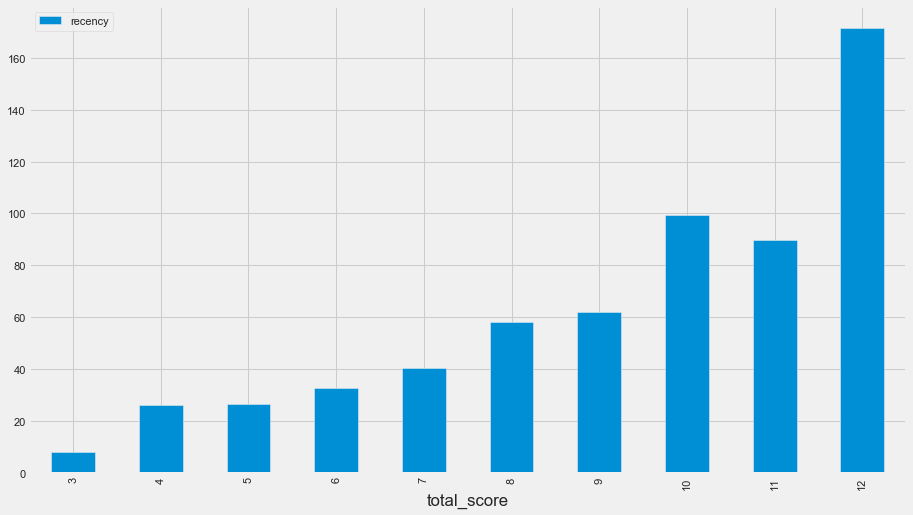

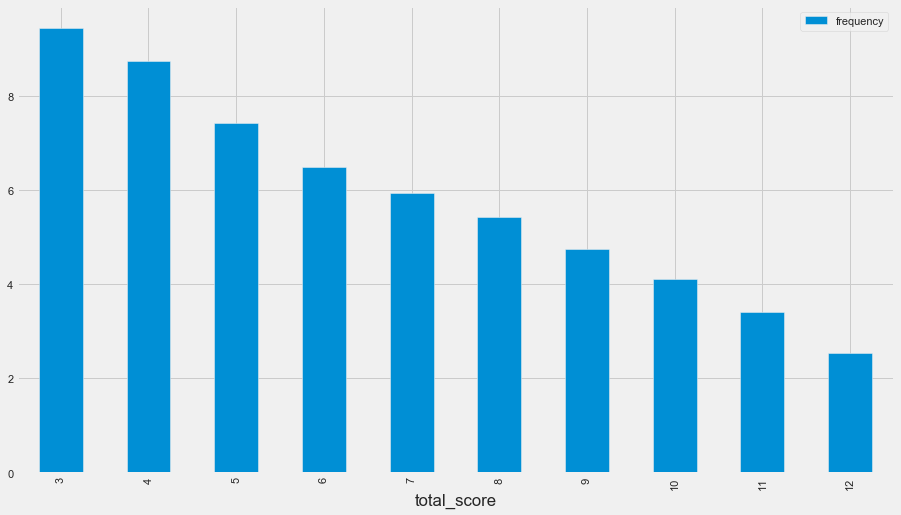

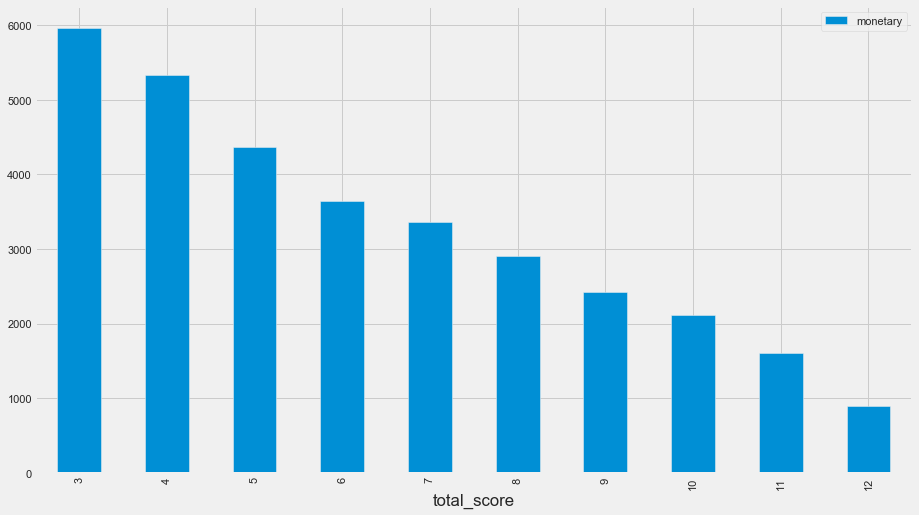

In [35]:
mpl.style.use('fivethirtyeight')
customer_df.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
customer_df.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
customer_df.groupby('total_score').agg('monetary').mean().to_frame().plot(kind='bar')

plt.show()

In [36]:
customer_title_df = customer_df.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_title_df.rename(columns={'rfm_class': 'count'}, inplace=True)

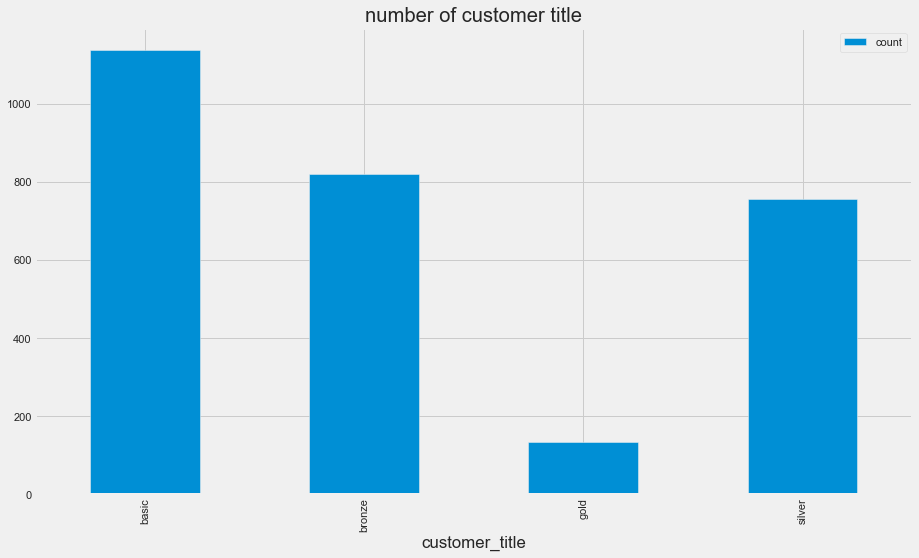

In [37]:
customer_title_df.plot.bar(stacked=True)
plt.title('number of customer title')
plt.show()

In [38]:
customer_title_df.transpose()

customer_title  basic  bronze  gold  silver
count            1138     821   134     757

In [39]:
customer_title_df

count
customer_title       
basic            1138
bronze            821
gold              134
silver            757

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=customer_df.recency, y=customer_df.monetary, mode = 'markers', name='recency & monetary'))
fig.update_layout(showlegend=True)
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=customer_df.recency, y=customer_df.frequency, mode = 'markers', name='recency & frequency'))
fig.update_layout(showlegend=True)
fig.show()

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=customer_df.frequency, y=customer_df.monetary, mode = 'markers', name='frequency & monetary'))
fig.update_layout(showlegend=True)
fig.show()

# Data Cleaning New Customer

In [43]:
new_customer_df = pd.read_excel(file_path, header=1, sheet_name='NewCustomerList')
new_customer_df.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.56      0.7000       0.8750     0.743750   
1                  11        0.89      0.8900       1.1125     0.945625   
2                   5        1.01      1.0100       1.0100     1.010000   
3                   1        0.87      1.0875       1.0875     1.087500   
4                   9        0.52      0.5200       0.6500     0.650000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [44]:
new_customer_df_clean = new_customer_df.dropna()

In [45]:
new_customer_df_clean['age'] = (dt.datetime.now() - new_customer_df_clean['DOB']) / np.timedelta64(1, 'Y')
new_customer_df_clean['age_class'] = ((round(new_customer_df_clean['age'] / 10)) * 10).astype(int)
new_customer_df_clean.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  property_valuation  \
0      Mass Customer                  N      Yes  ...                   6   
1      Mass Customer                  N       No  ...                  11   
2  Affluent Customer                  N       No  ...                   5   
3  Affluent Customer                  N      Yes  ...                   1   
4  Affluent Customer                  N       No  ...                   9   

  Unnamed: 16  Unnamed: 17 Unnamed: 18 Unnamed: 19  Unnamed: 20  Rank  \
0        0.56       0.7000      0.8750    0.743750            1     1   
1        0.89       0.8900      1.1125    0.945625            1     1   
2        1.01       1.0100      1.0100    1.010000            1     1   
3        0.87       1.0875      1.0875    1.087500            4     4   
4        0.52       0.5200      0.6500    0.650000            4     4   

      Value        age  age_class  
0  1.718750  63.452309         60  
1  1.718750  50.759372         50  
2  1.718750  46.323962         50  
3  1.703125  41.904980         40  
4  1.703125  55.257753         60  

[5 rows x 25 columns]

# Compare features about New Customer and Existing Customer

In [46]:
# show text about value & percent
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

In [47]:
# a method to produce two figures about the same feature of old and new customer and choose figure type
def compare_figures(feature, title_name, figure, figure2):
    if feature == 'job_industry_category':
        df = customer_df.groupby(feature)['customer_title'].value_counts().unstack(level=1).sort_values(by=['basic'],ascending=False)
    else:
        df = customer_df.groupby(feature)['customer_title'].value_counts().unstack(level=1).sort_index(1)
    
    if figure == 'bar':
        df.plot.bar(stacked=True)
        for i, v in enumerate(df.sum(axis =1)):
            plt.text(i , v , int(v), color='black', ha='center', va= 'bottom')
    elif figure == 'pie':        
        df.plot.pie(subplots=True, autopct=make_autopct2(df.sum(axis =1)))
        
    plt.title(title_name + ' - Old Customer')
    plt.show()
    
    new_df = new_customer_df_clean[feature].value_counts().sort_index(0)
    if figure2 == 'bar':
        new_df.plot.bar()
        for i, v in enumerate(new_df):
            plt.text(i , v , v, color='black', ha='center', va= 'bottom')
    elif figure2 == 'pie':        
        new_df.plot.pie(subplots=True, autopct=make_autopct(new_df))
        
    plt.title(title_name + ' - New Customer')
    plt.show()
    
    print(df)
    print(new_df)

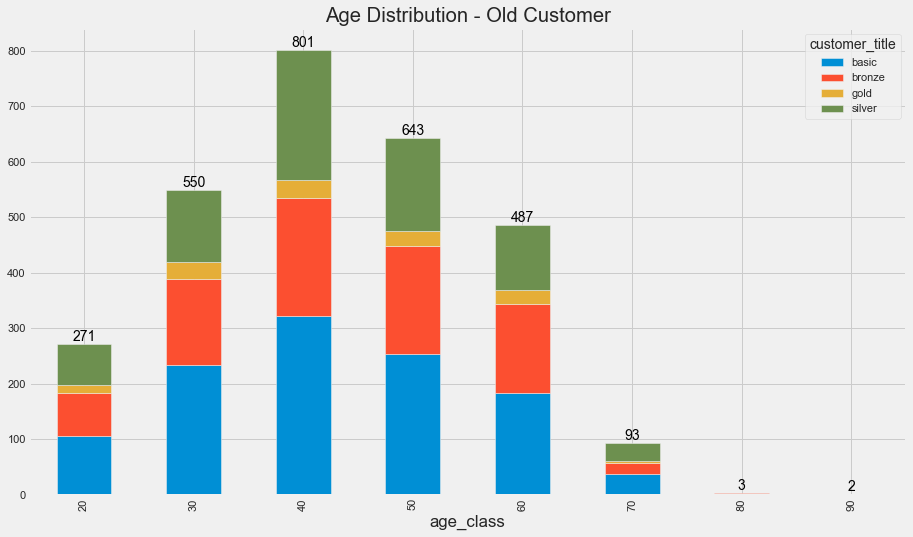

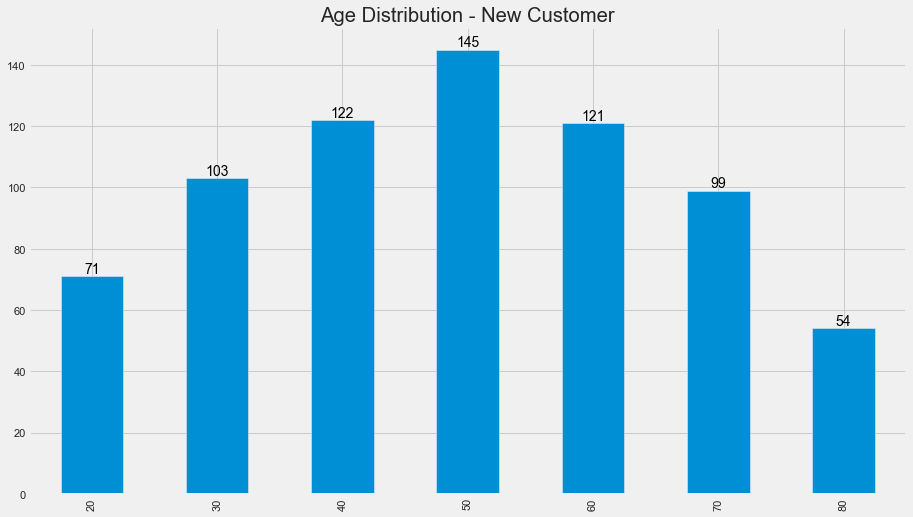

customer_title  basic  bronze  gold  silver
age_class                                  
20              106.0    78.0  14.0    73.0
30              233.0   155.0  31.0   131.0
40              323.0   211.0  33.0   234.0
50              254.0   194.0  27.0   168.0
60              183.0   160.0  26.0   118.0
70               37.0    21.0   3.0    32.0
80                1.0     2.0   NaN     NaN
90                1.0     NaN   NaN     1.0
20     71
30    103
40    122
50    145
60    121
70     99
80     54
Name: age_class, dtype: int64


In [48]:
# age distribution
compare_figures('age_class', 'Age Distribution', 'bar', 'bar')

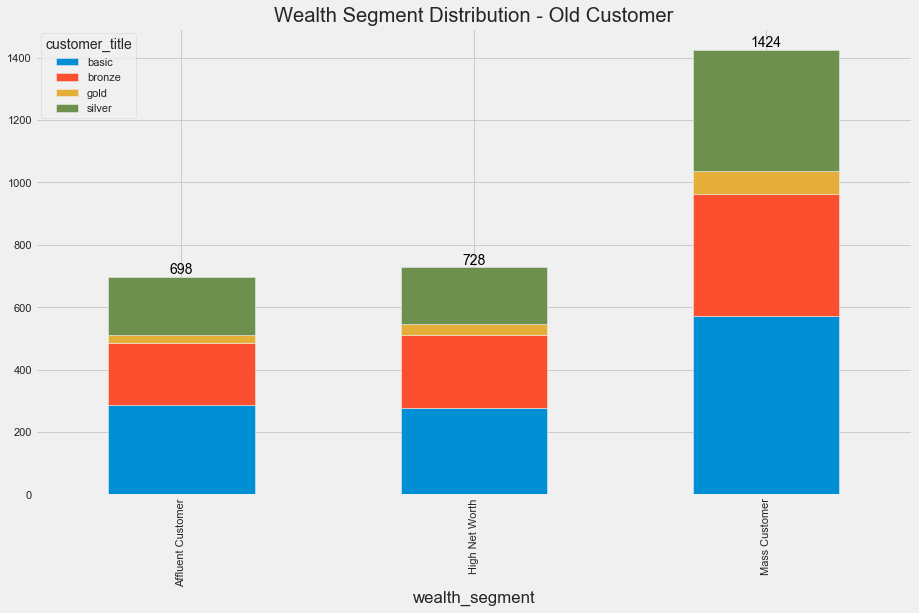

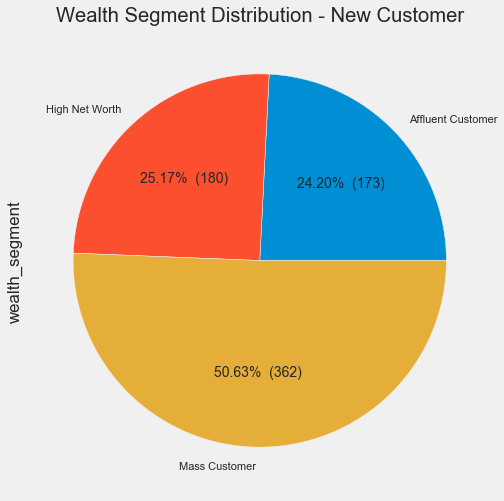

customer_title     basic  bronze  gold  silver
wealth_segment                                
Affluent Customer    287     197    26     188
High Net Worth       278     233    36     181
Mass Customer        573     391    72     388
Affluent Customer    173
High Net Worth       180
Mass Customer        362
Name: wealth_segment, dtype: int64


In [49]:
# wealth segment distribution
compare_figures('wealth_segment', 'Wealth Segment Distribution', 'bar', 'pie')

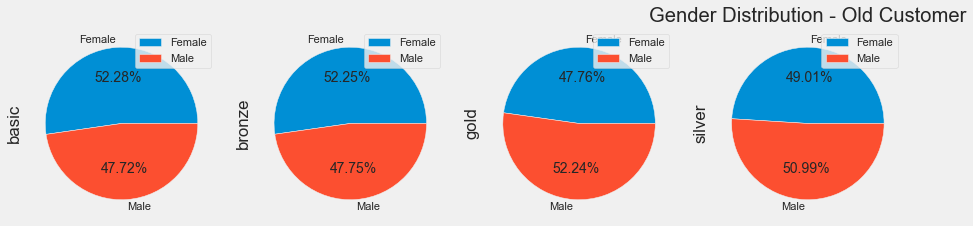

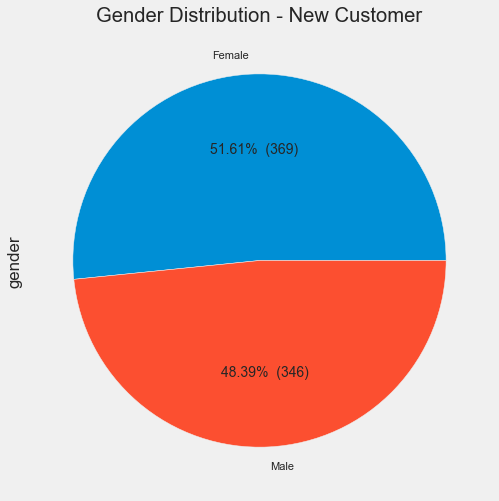

customer_title  basic  bronze  gold  silver
gender                                     
Female            595     429    64     371
Male              543     392    70     386
Female    369
Male      346
Name: gender, dtype: int64


In [50]:
# gender distribution 
compare_figures('gender', 'Gender Distribution', 'pie', 'pie')

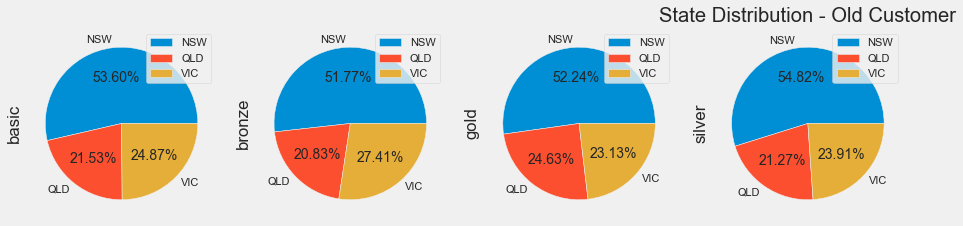

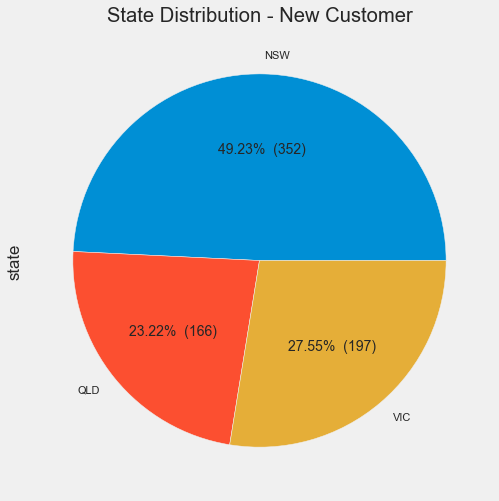

customer_title  basic  bronze  gold  silver
state                                      
NSW               610     425    70     415
QLD               245     171    33     161
VIC               283     225    31     181
NSW    352
QLD    166
VIC    197
Name: state, dtype: int64


In [230]:
# state distribution 
compare_figures('state', 'State Distribution', 'pie', 'pie')

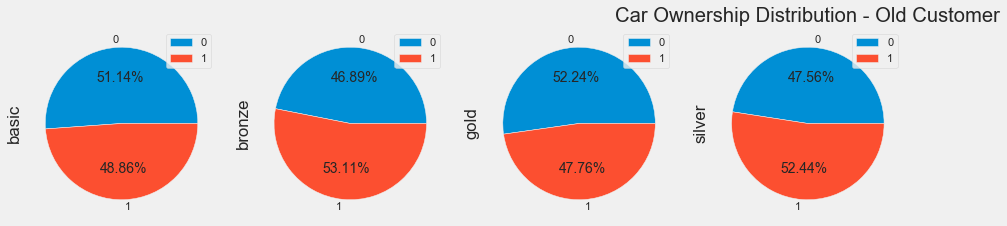

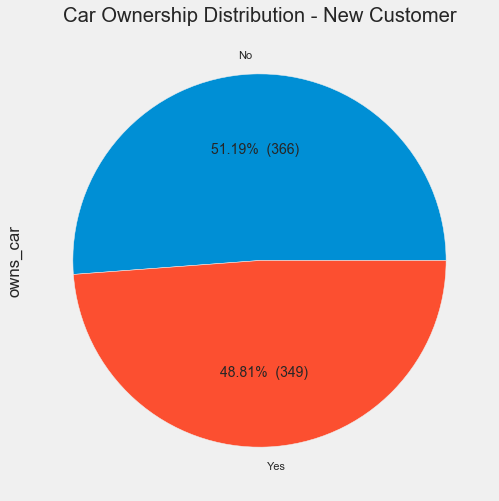

customer_title  basic  bronze  gold  silver
owns_car                                   
0                 582     385    70     360
1                 556     436    64     397
No     366
Yes    349
Name: owns_car, dtype: int64


In [52]:
# car ownership distribution 
compare_figures('owns_car', 'Car Ownership Distribution', 'pie', 'pie')

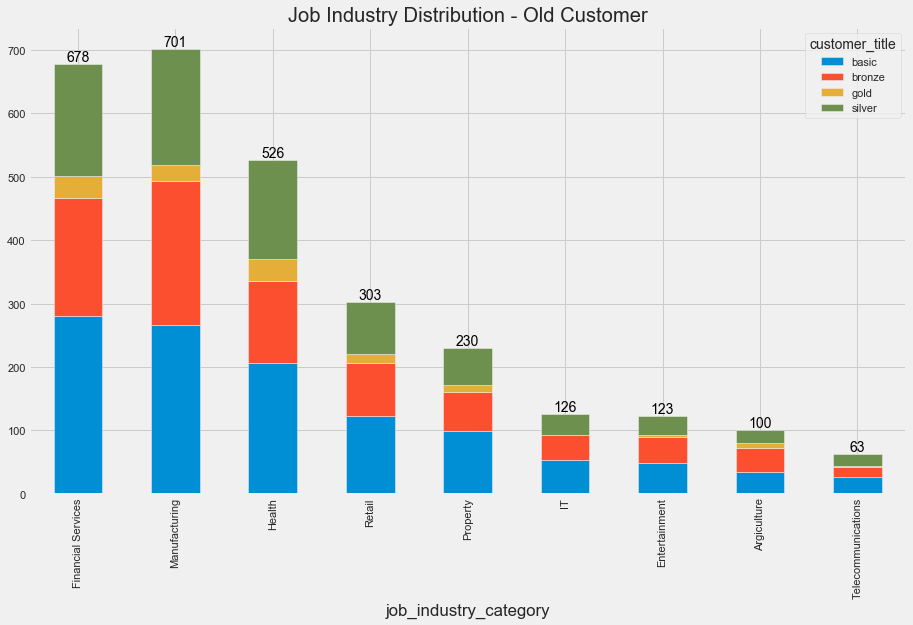

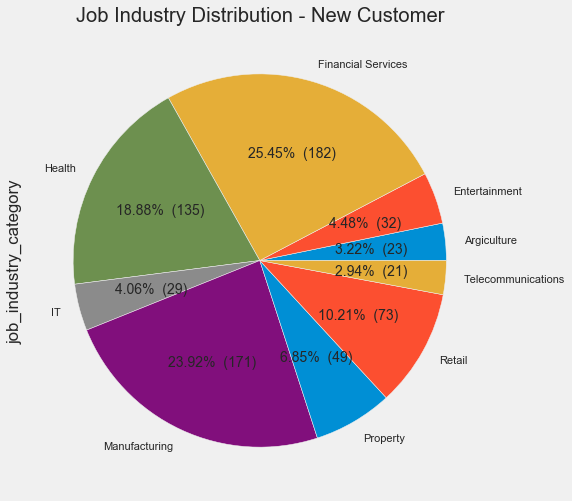

customer_title         basic  bronze  gold  silver
job_industry_category                             
Financial Services       280     187    35     176
Manufacturing            267     226    25     183
Health                   207     129    35     155
Retail                   123      83    15      82
Property                  99      62    10      59
IT                        53      39     1      33
Entertainment             49      40     4      30
Argiculture               34      39     7      20
Telecommunications        26      16     2      19
Argiculture            23
Entertainment          32
Financial Services    182
Health                135
IT                     29
Manufacturing         171
Property               49
Retail                 73
Telecommunications     21
Name: job_industry_category, dtype: int64


In [53]:
# Job Industry distribution 
compare_figures('job_industry_category', 'Job Industry Distribution', 'bar', 'pie')

# Select Top 1000 Customer

In [54]:
customer_df['customer_segment'] = customer_df['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})



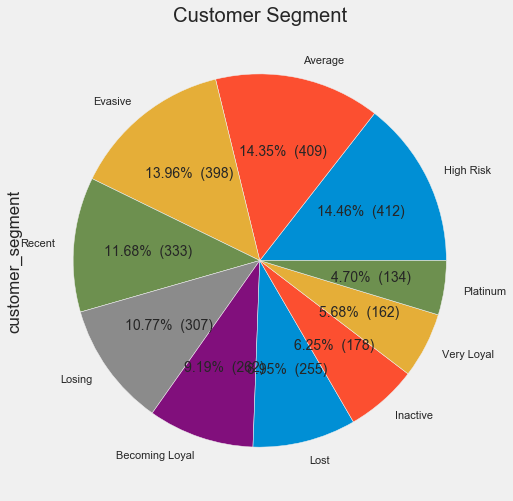

In [229]:
customer_df['customer_segment'].value_counts().plot.pie(autopct=make_autopct(customer_df['customer_segment'].value_counts()), title = 'Customer Segment')

In [55]:
final_customer_list = customer_df.sort_values(['total_score'])[:1000]
final_customer_list = final_customer_list.iloc[: , 8:]
final_customer_list = final_customer_list.iloc[:, [1,3,4,5,6,7, 12,15]]
final_customer_list

gender        DOB job_industry_category     wealth_segment  \
customer_id                                                               
2103           Male 1975-09-22    Financial Services  Affluent Customer   
3470         Female 1967-10-01                Health  Affluent Customer   
725            Male 1965-08-27                Health     High Net Worth   
2476           Male 1956-09-25              Property     High Net Worth   
902          Female 1989-07-26                Retail      Mass Customer   
...             ...        ...                   ...                ...   
1763         Female 1994-10-30         Manufacturing  Affluent Customer   
1776           Male 1978-08-26    Financial Services  Affluent Customer   
1760         Female 1966-04-27                Health     High Net Worth   
1759           Male 1969-06-02    Financial Services     High Net Worth   
2354         Female 1958-12-19                Retail      Mass Customer   

             owns_car  tenure state customer_segment  
customer_id                                           
2103                0    18.0   NSW         Platinum  
3470                1     6.0   VIC         Platinum  
725                 1    19.0   QLD         Platinum  
2476                0    17.0   QLD         Platinum  
902                 0    18.0   NSW         Platinum  
...               ...     ...   ...              ...  
1763                1     7.0   VIC          Average  
1776                0    10.0   QLD          Average  
1760                0    15.0   VIC          Average  
1759                0    15.0   NSW          Average  
2354                0    17.0   VIC          Average  

[1000 rows x 8 columns]

# Module 3 visiualization

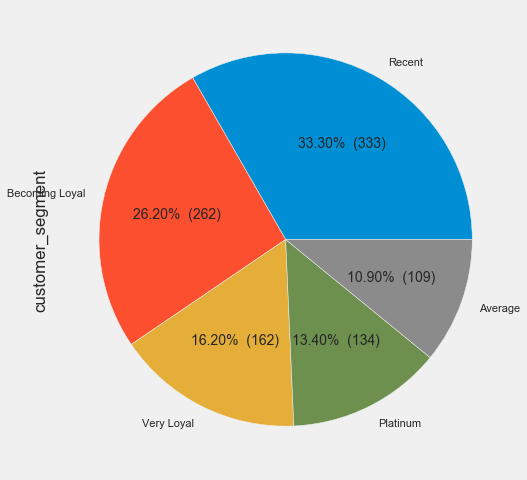

In [66]:
final_customer_list['customer_segment'].value_counts().plot.pie(autopct=make_autopct(final_customer_list['customer_segment'].value_counts()))

In [141]:
def dig(feature, title_name, figure):

    df = customer_df.groupby('customer_segment')[feature].mean()

    if figure == 'bar':
        df.plot.bar(stacked=True)
        for i, v in enumerate(df):
            plt.text(i , v , int(v), color='black', ha='center', va= 'bottom')
    elif figure == 'pie':        
        df.plot.pie(subplots=True, autopct=make_autopct(df))
        
    plt.title(title_name )
    plt.show()

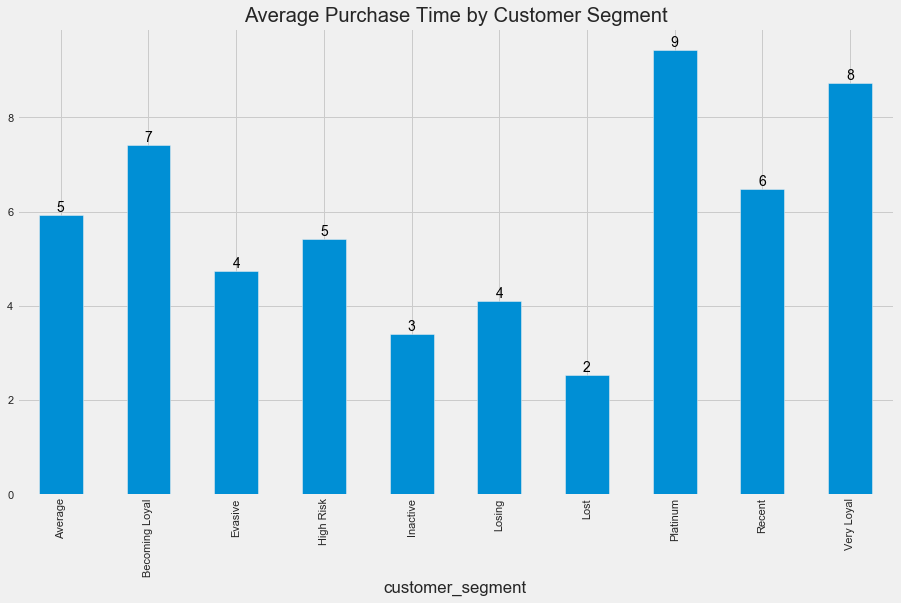

In [143]:
dig('frequency', 'Average Purchase Time by Customer Segment', 'bar')

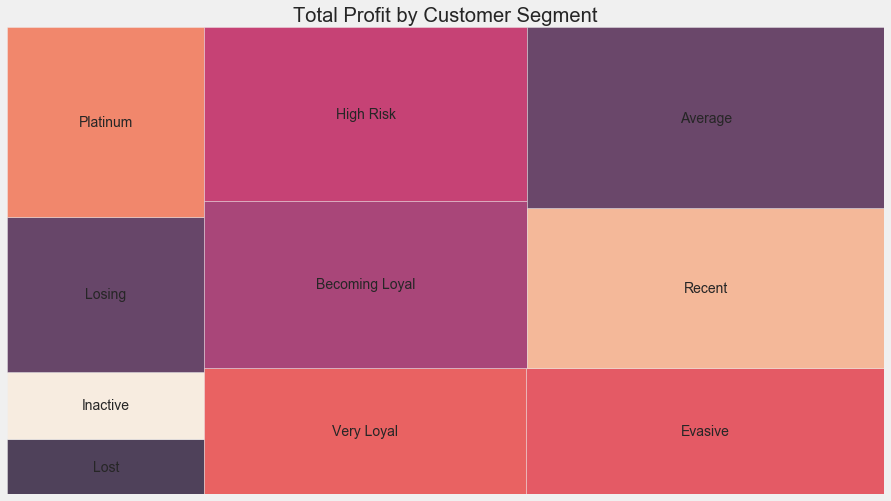

In [138]:
df = customer_df.groupby('customer_segment')['monetary'].sum().sort_values()
squarify.plot(sizes=df.values, label=df.index, alpha=.8)
plt.title('Total Profit by Customer Segment' )
plt.axis('off')
plt.show()

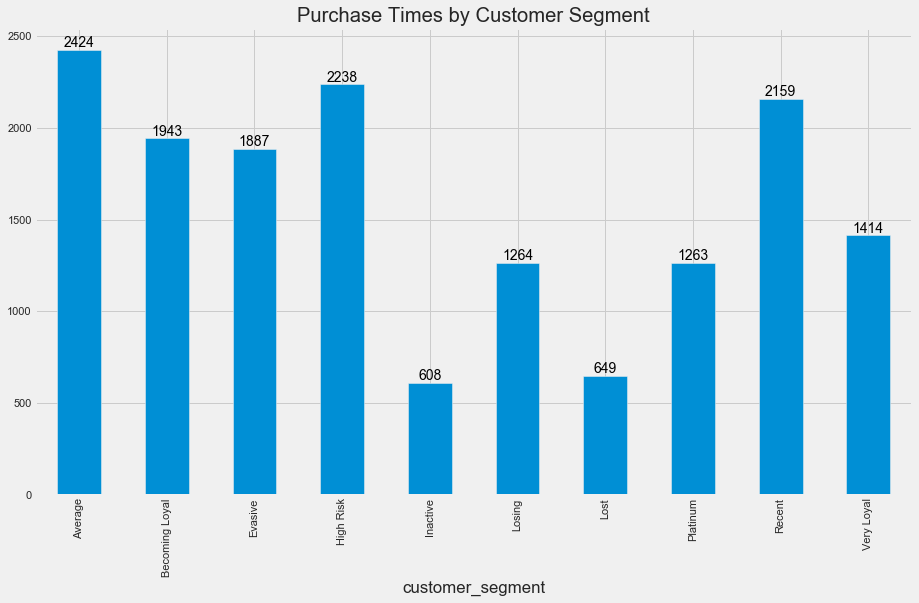

In [105]:
dig('frequency', 'Average Purchase Times by Customer Segment', 'pie')

In [145]:
customer_df.columns

Index(['recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score',
       'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation',
       'customer_segment'],
      dtype='object')

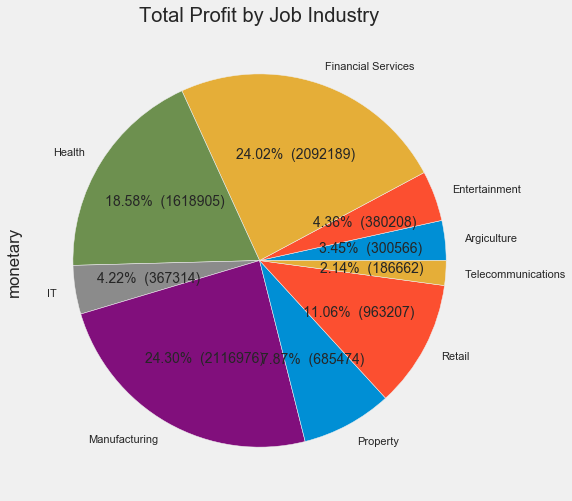

In [185]:
df = customer_df.groupby(['job_industry_category'])['monetary'].sum()
df.plot.pie(subplots=True, autopct=make_autopct(df))
plt.title('Total Profit by Job Industry' )
plt.show()

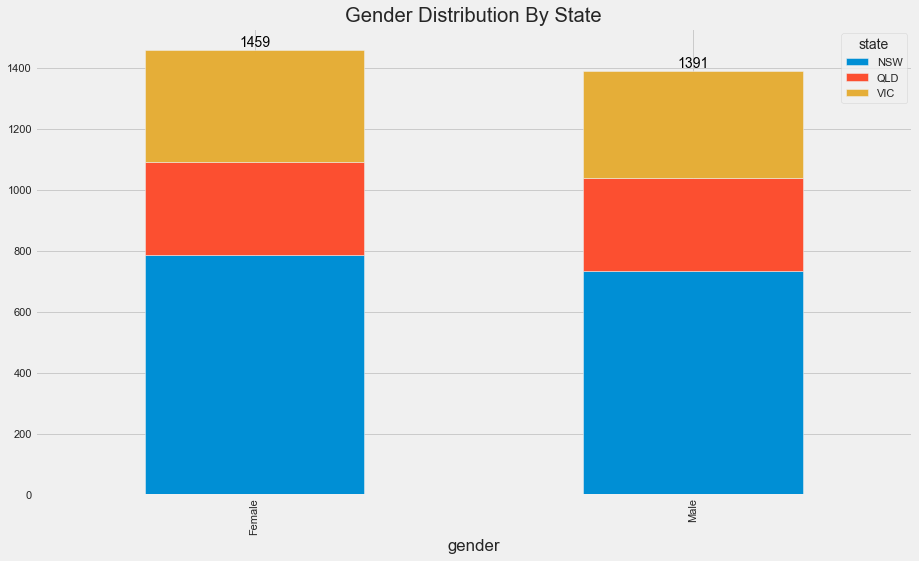

In [228]:
df = customer_df.groupby('gender')['state'].value_counts().unstack(level=1).sort_index(1)
df.plot.bar(stacked=True, title = 'Gender Distribution By State')
for i, v in enumerate(df.sum(axis =1)):
    plt.text(i , v , int(v), color='black', ha='center', va= 'bottom')

In [200]:
date_df = tran_df_clean
date_df = date_df.set_index('transaction_date')
date_df

product_id  customer_id  online_order order_status  \
transaction_date                                                       
2017-03-27                23            1           0.0     Approved   
2017-03-29                11            1           1.0     Approved   
2017-12-09                 9            1           1.0     Approved   
2017-05-11                47            1           1.0     Approved   
2017-02-21                 2            1           0.0     Approved   
...                      ...          ...           ...          ...   
2017-04-25                 2         3500           0.0     Approved   
2017-02-16                74         3500           0.0     Approved   
2017-10-07                 0         5034           0.0     Approved   
2017-01-27                 0         5034           0.0     Approved   
2017-01-03                 0         5034           0.0     Approved   

                           brand product_line product_class product_size  \
transaction_date                                                           
2017-03-27        Norco Bicycles     Mountain           low        small   
2017-03-29        Giant Bicycles     Standard          high       medium   
2017-12-09            OHM Cycles         Road        medium       medium   
2017-05-11         Trek Bicycles         Road           low        small   
2017-02-21                 Solex     Standard        medium       medium   
...                          ...          ...           ...          ...   
2017-04-25                 Solex     Standard        medium       medium   
2017-02-16              WeareA2B     Standard        medium       medium   
2017-10-07                 Solex         Road        medium       medium   
2017-01-27        Norco Bicycles     Standard        medium       medium   
2017-01-03            OHM Cycles         Road        medium       medium   

                  list_price  standard_cost product_first_sold_date  \
transaction_date                                                      
2017-03-27            688.63     612.880000              1991-08-07   
2017-03-29           1274.93     764.960000              1996-11-11   
2017-12-09            742.54     667.400000              2003-08-07   
2017-05-11           1720.70    1531.420000              2003-07-23   
2017-02-21             71.49      53.620000              2005-08-11   
...                      ...            ...                     ...   
2017-04-25             71.49      53.620000              2012-12-04   
2017-02-16           1228.07     400.910000              2000-05-24   
2017-10-07            416.98     312.735016              2015-08-04   
2017-01-27            360.40     270.299988              1997-08-27   
2017-01-03            742.54     667.400024              1992-10-04   

                  recent_value      profit  
transaction_date                            
2017-03-27               278.0   75.750000  
2017-03-29               276.0  509.970000  
2017-12-09                21.0   75.140000  
2017-05-11               233.0  189.280000  
2017-02-21               312.0   17.870000  
...                        ...         ...  
2017-04-25               249.0   17.870000  
2017-02-16               317.0  827.160000  
2017-10-07                84.0  104.244984  
2017-01-27               337.0   90.100012  
2017-01-03               361.0   75.139976  

[19445 rows x 13 columns]

In [201]:
df_period = date_df.to_period('M')

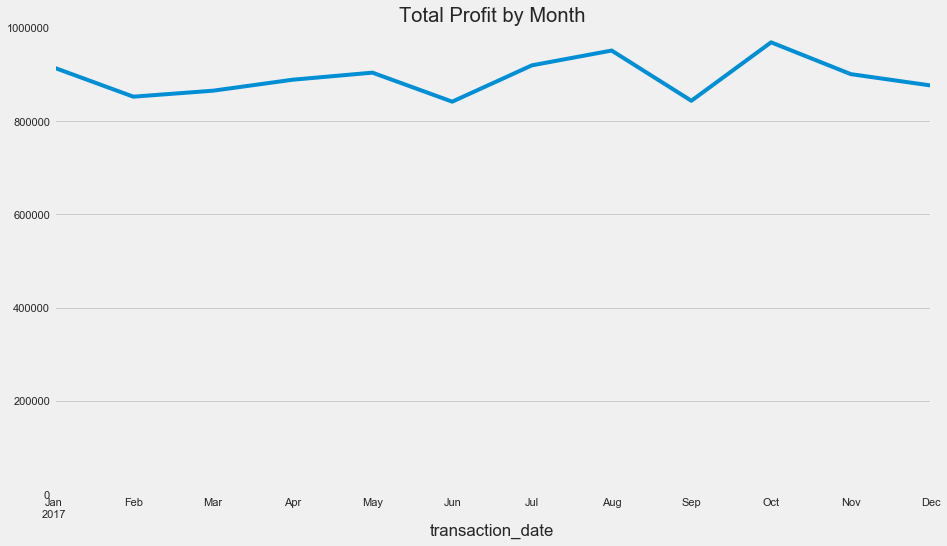

In [231]:
df = df_period.resample('M')['profit'].sum()
df.plot.line(title = 'Total Profit by Month', ylim = (0, 1000000))
plt.show()